# Почему Python

Python на 3 месте по популярности в мире. [Рейтинг языков на 2021](https://www.tiobe.com/tiobe-index/)

Python есть [для всех платформ](https://www.python.org/downloads/)

Для простоты установки библиотек можно использовать [anaconda](https://www.anaconda.com/products/individual)

Много библиотек:
* [numpy](https://numpy.org/)
* [matplotlib](https://matplotlib.org/)
* [pandas](https://pandas.pydata.org/)
* [cartopy](https://scitools.org.uk/cartopy/docs/latest/)
* [scikit-learn](https://scikit-learn.org/stable/)

Среды разработки
* [jupyter](https://jupyter.org/)
* [pycharm](https://www.jetbrains.com/pycharm/)

В jupyter можно LATEX$ \sqrt{2}$

$\int_{x=0}^3 x^2\,dx$

## Обработка данных

In [2]:
import pandas as pd
pd.set_option('max_columns', None)

In [3]:
data_small = pd.read_csv('./data/earthchem_download_571.txt',   sep='\t')
data_big   = pd.read_csv('./data/earthchem_download_29553.txt', sep='\t')

In [4]:
# Бегло посмотрим что за данные мы загрузили
data_small.head()

,SAMPLE ID,IGSN,SOURCE,REFERENCE,EXPEDITION ID,LATITUDE,LONGITUDE,LOC PREC,MAX ELEVATION,MIN ELEVATION,MIN AGE,AGE,MAX AGE,METHOD,ANALYZED MATERIAL,ROCK TYPE,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,FEOT,MGO,CAO,NA2O,K2O,SR87_SR86,ND143_ND144
0,PETDB-3215-ML-38,NaN,EARTHCHEMDB,"RHODES, J M, 2015",nr,19.3000,-155.500,0.1000,NaN,NaN,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,NaN,51.61,2.09,13.61,NaN,6.93,10.54,2.14,0.35,NaN,NaN
1,PETDB-3215-R130-7.0,NaN,EARTHCHEMDB,"RHODES, J M, 2015",nr,19.7408,-155.050,0.0001,NaN,NaN,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,THOLEIITE,NaN,45.53,1.78,11.15,NaN,18.99,6.97,1.04,0.09,NaN,NaN
2,JS20017-013,NaN,EARTHCHEMDB,"RHODES, J M, 2015",JS20017-013,19.3768,-155.937,0.0001,-1040.0,-1040.0,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,ALKALI BASALT,NaN,46.81,3.49,15.73,NaN,6.09,8.54,3.59,0.90,NaN,NaN
3,PETDB-3215-ML-259,NaN,EARTHCHEMDB,"RHODES, J M, 2015",nr,19.3000,-155.500,0.1000,NaN,NaN,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,NaN,51.68,2.08,13.83,NaN,6.88,10.52,2.38,0.38,NaN,NaN
4,MOA9902-002-021,NaN,EARTHCHEMDB,"RHODES, J M, 2015",MOA1999,18.6972,-155.771,0.0001,-3600.0,-3600.0,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,PICRITE,NaN,47.33,1.33,8.67,NaN,21.61,6.89,1.38,0.22,NaN,NaN


In [5]:
# Нас интересуют следующие столбцы:
# координаты: 'LATITUDE', 'LONGITUDE'
# тип породы: 'ROCK NAME'
# хим состав: 'SIO2', 'NA2O', 'K2O'
data = data_small[['LATITUDE', 'LONGITUDE', 'ROCK NAME', 'SIO2', 'NA2O', 'K2O']]
data.head()

,LATITUDE,LONGITUDE,ROCK NAME,SIO2,NA2O,K2O
0,19.3000,-155.500,BASALT,51.61,2.14,0.35
1,19.7408,-155.050,THOLEIITE,45.53,1.04,0.09
2,19.3768,-155.937,ALKALI BASALT,46.81,3.59,0.90
3,19.3000,-155.500,BASALT,51.68,2.38,0.38
4,18.6972,-155.771,PICRITE,47.33,1.38,0.22


In [17]:
# Сколько строк в дата сете ?
data.shape

(1492, 6)

In [18]:
# Сколько типов пород в данных?
data['ROCK NAME'].unique()

array(['BASALT', 'THOLEIITE', 'ALKALI BASALT', 'PICRITE', 'PERIDOTITE'],
      dtype=object)

In [15]:
# В каких строчках отсутствуют данные ?
# Сколько таких строчек ?
data[data.isna().any(axis=1)]

,LATITUDE,LONGITUDE,ROCK NAME,SIO2,NA2O,K2O
17,20.0830,-155.7170,BASALT,NaN,NaN,NaN
27,19.7408,-155.0500,BASALT,NaN,2.10,0.440
28,19.7408,-155.0500,BASALT,NaN,NaN,NaN
82,19.7408,-155.0500,BASALT,NaN,1.60,0.290
83,19.7408,-155.0500,BASALT,NaN,NaN,NaN
154,22.0367,-158.9200,BASALT,NaN,NaN,NaN
158,21.7323,-158.9990,BASALT,NaN,NaN,NaN
171,22.0212,-158.9040,BASALT,NaN,NaN,NaN
202,19.7500,-155.9300,PERIDOTITE,NaN,NaN,NaN
218,22.2668,-158.9670,BASALT,NaN,NaN,NaN


## Графики

In [20]:
# импортируем бибилотеки для построения графиков
import matplotlib.pyplot as plt

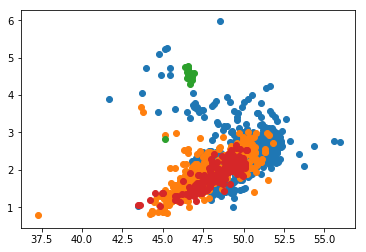

In [22]:
# для каждого типа породы построим зависимость оксидов щелочных металлов от диоксида кремния
for rock_name in data['ROCK NAME'].unique():
    mask = data['ROCK NAME'] == rock_name
    rock_data = data[mask]
    plt.scatter(rock_data['SIO2'], rock_data['NA2O'] + rock_data['K2O'])

## Откуда данные ?

In [24]:
# импортируем библиотеку для рисования карт
import cartopy.crs as ccrs

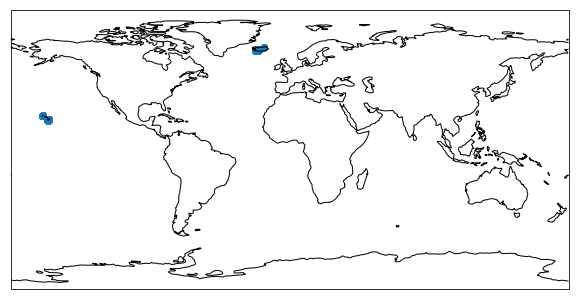

In [26]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.scatter(data['LONGITUDE'], data['LATITUDE'])

In [27]:
# Сохраним дата сет только с нужными колонками в файл
data.to_csv('clean_small.csv', sep='\t')

In [28]:
!cat clean_small.csv

	LATITUDE	LONGITUDE	ROCK NAME	SIO2	NA2O	K2O
0	19.3	-155.5	BASALT	51.61	2.14	0.35
1	19.7408	-155.05	THOLEIITE	45.53	1.04	0.09
2	19.3768	-155.937	ALKALI BASALT	46.81	3.59	0.9
3	19.3	-155.5	BASALT	51.68	2.38	0.38
4	18.6972	-155.77100000000002	PICRITE	47.33	1.38	0.22
5	19.51	-155.5	THOLEIITE	48.75	2.29	0.59
6	19.51	-155.5	THOLEIITE	50.31	2.39	0.48
7	19.51	-155.5	THOLEIITE	45.94	1.02	0.14
8	19.51	-155.5	THOLEIITE	47.91	1.55	0.21
9	19.4627	-155.985	BASALT	51.56	2.56	0.46
10	19.3	-155.5	BASALT	51.0	2.03	0.29
11	19.7408	-155.05	THOLEIITE	49.91	2.26	0.18
12	64.2824	-20.8691	BASALT	49.03	1.48	0.18
13	64.2307	-21.0022	BASALT	48.45	1.81	0.1
14	19.3	-155.5	BASALT	51.95	2.48	0.44
15	19.3	-155.5	BASALT	51.7	2.54	0.36
16	19.3	-155.5	BASALT	51.88	1.98	0.4
17	20.083	-155.717	BASALT			
18	20.083	-155.717	BASALT	48.77	2.39	0.78
19	18.8069	-155.85	BASALT	50.93	2.12	0.31
20	64.5811	-20.6348	BASALT	49.19	1.44	0.11
21	19.3	-155.5	BASALT	51.84	2.45	0.4
22	18.6758	-155.686	PICRITE	46.66	1.29	0.19
23	18.6867	-15